# Analysis of the Solow Model with Human Capital

Imports and set magics:

In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Model description

**The Basic Solow Model** 

For our model project, we look into the dymamics of the Solow model. The Solow model, in its basic form, is a long-run economic model, which attempts to explain economic growth by capital accumulation. The model is taken from the textbook from Macroeconomics II and the parameter values are based on common empirical findings.

The Solow model with technological growth consists of the following functions:

$$ Y_t = K_t^\alpha(A_tL_t)^{1-\alpha}, 0 < \alpha < 1 $$
$$ K_{t+1}=S_t+(1-\delta)K_t,  0 < \delta < 1 $$
$$ S_t = sY_t,  0 < s < 1 $$
$$ L_{t+1}= (1+n)L_t $$
$$ A_{t+1} = (1+g)A_t $$

where
$Y_t$ is production, $K_t$ is physical capital, $A_t$ is technology, $S_t$ is savings and $L_t$ is labor.

To start analyzing the model, we start by defining the parameters beneath


In [2]:
# We define the parameters used in the model
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
k = sm.symbols('k')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

## Analytical solution

We wish to find the transition equation for capital per effective worker, which we define as $ \tilde{k}_t=\frac{K_t}{A_tL_t}$.

Start by dividing capital accumulation with $ A_{t+1}L_{t+1}$

$$ \frac{K_{t+1}}{A_{t+1}L_{t+1}} = \frac{S_t+(1-\delta)K_t}{A_{t+1}L_{t+1}} $$

Then the last three functions described above for the model are inserted

$$ \tilde{k}_{t+1}=\frac{sY_t+(1-\delta)K_t}{L_t(1+n)A_t(1+g)} \Leftrightarrow $$
$$ \tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}[s\tilde{y_t}+(1-\delta)\tilde{k}_t]$$

Using the defintion for the tilde production function, $\tilde{y}_t=\frac{Y_t}{A_tL_t} $, we get $\tilde{y}_t=\tilde{k}_t^\alpha$. Thereby, the transition equation becomes

$$ \tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}[s\tilde{k}_t^\alpha+(1-\delta)\tilde{k}_t]$$

from which we find the analytical steady state below.

In [3]:
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

## Numerical solution

Now we wish to solve the model for a numerical solution for the steady state. We use following parameter values:

$
\alpha = 1/3, \delta = 0.1, s = 0.2, g = 0.02, n = 0.02$


In [4]:
ss_func = sm.lambdify((s,g,n,delta,alpha),kss)

# Evaluate function
ss_func(0.2,0.02,0.02,0.1,1/3)

print(f'The steady state value for k is {ss_func(0.2,0.02,0.02,0.1,1/3):1f}')

The steady state value for k is 1.700178


For us to make a usable comparison later in this project, we also wish to fine steady state per effective worker in the economy. This is defined as

$$\tilde{y}^*=(\tilde{k}^*)^\alpha=\left(\frac{s}{n + g + ng +\delta}\right)^{\frac{\alpha}{1-\alpha}}$$

In [5]:
# We define the steady state
y_tilde1 = ((s)/(n+g+n*g+delta))**(alpha/(1-alpha))

# Now we turn them in to python function, using sympy lambdify.
yss_function1 = sm.lambdify((alpha,delta,n,g,s),y_tilde1)

print(f'The steady state value for y is {yss_function1(1/3,0.1,0.02,0.02,0.2):1f}')

The steady state value for y is 1.193525


# Further analysis

We now decide to extend our Solow model to include human capital as well. The extended model will be defined by the following functions:

$$ Y_t=K_t^\alpha H_t^\phi (A_tL_t)^{1-\alpha-\sigma}, 0 < \alpha,\phi < 1 $$
$$ L_{t+1}=(1+n)L_t $$
$$ A_{t+1}(1+g)A_t$$
$$ K_{t+1}=s_KY_t+(1-\delta)K_t $$
$$ H_{t+1}=s_HY_t+(1-\delta)H_t $$

Compared to the variables in the basic Solow moodel, we now include $H_t$ for human capital.

As previously, we compute the per effective worker (tilde), functions

$$ \tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}[s_K\tilde{y}_t+(1-\delta)\tilde{k}_t ]$$

$$ \tilde{h}_{t+1}=\frac{1}{(1+n)(1+g)}[s_H\tilde{y}_t+(1-\delta)\tilde{h}_t ]$$

where $\tilde{y}_t=\tilde{k}_t^\alpha\tilde{h}_t^\phi $

In [6]:
# We define the parameters used in the model
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
phi = sm.symbols('phi')
k = sm.symbols('k')
h = sm.symbols('h')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
g = sm.symbols('g')
n = sm.symbols('n')

And solve for the analytical steady state for physical and human capital, respectively:

In [7]:
y = k**alpha*h**phi

# For physical capital
ss1 = sm.Eq(k,(s_K*y+(1-delta)*k)/((1+n)*(1+g)))
kss1 = sm.solve(ss1,k)[0]
kss1

((delta + g*n + g + n)/(h**phi*s_K))**(1/(alpha - 1))

In [8]:
# For human capital
ss2 = sm.Eq(h,(s_H*y+(1-delta)*h)/((1+n)*(1+g)))
hss = sm.solve(ss2,h)[0]
hss

((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1))

Which we solve as two equations with two unknowns and get the following steady states:

$$\tilde{k}^*=\left(\frac{s_K^{1-\phi}s_H^\phi}{n + g + ng +\delta}\right)^{\frac{1}{1-\alpha-\phi}} $$

$$\tilde{h}^*=\left(\frac{s_K^{\alpha}s_H^{1-\alpha}}{n + g + ng +\delta}\right)^{\frac{1}{1-\alpha-\phi}} $$

We also wish to compute the numerical values, which is done below. We use following parameter values:

$
\alpha = 1/3, \phi = 1/3, \delta = 0.1, s_K = 0.2, s_H = 0.3, g = 0.02, n = 0.02$

Empirially it has been observed, that the savings rate in human capital takes a value between 0.2 and 0.4, hence we have chosen 0.3.


In [9]:
# We define the two steady states:
k_tilde = ((s_K**(1-phi) * s_H**phi)/(n+g+delta +n*g))**(1/(1-phi-alpha))
h_tilde = ( (s_K**(alpha) * s_H**(1-alpha))/(n+g+delta +n*g))**(1/(1-phi-alpha))
        
# Now we turn them in to python function, using sympy lambdify.
kss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),k_tilde)
hss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),h_tilde) 

print(f'The steady state value for k is {kss_function(1/3,1/3,0.1,0.02,0.02,0.2,0.3):1f}, and the steady state value for h is {hss_function(1/3,1/3,0.1,0.02,0.02,0.2,0.3):4f}')

The steady state value for k is 4.335907, and the steady state value for h is 6.503860


Having the steady state expressions for physical- and human capital, we can combine them to get output per effective worker in the steady state in the model.

$$\tilde{y}^*=(\tilde{k}^*)^\alpha(\tilde{h}^*)^\phi=\left(\frac{s_K^{1-\phi}s_H^\phi}{n + g + ng +\delta}\right)^{\frac{\alpha}{1-\alpha-\phi}}\left(\frac{s_K^{\alpha}s_H^{1-\alpha}}{n + g + ng +\delta}\right)^{\frac{\phi}{1-\alpha-\phi}} $$

We again wish to compute the numerical values, which is done below. The same parameter values as aboved are used.

In [10]:
# We define the steady state for output per worker, assuming above steady states:
y_tilde2 = ((k_tilde)**(alpha)*(h_tilde)**(phi))

# Now we turn them in to python function, using sympy lambdify.
yss2_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),y_tilde2)

print(f'The steady state value for y is {yss2_function(1/3,1/3,0.1,0.02,0.02,0.2,0.3):1f}')

The steady state value for y is 3.043806


We see, that after the inclusion of human capital in the model, steady state for physical capital increases from 1.70 units to 4.34 units per effective worker. More relevant, we also observe an increase in output per effective worker from 2.91 units to 3.50 units. Below is illustrated the transition diagrams for capital in the two different models. 


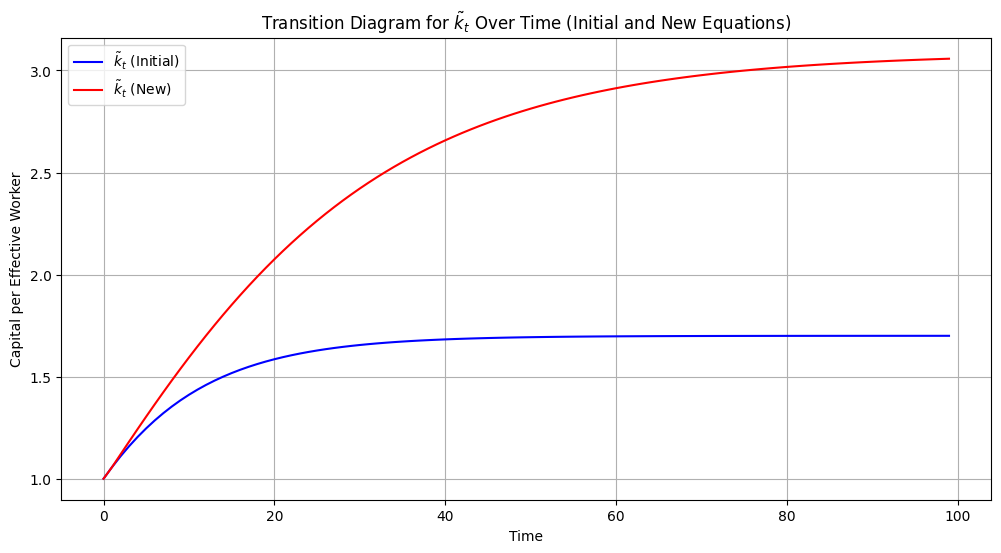

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 1/3
delta = 0.1
n = 0.02
g = 0.02
s = 0.2
s_H = 0.3
s_K = 0.2
phi = 1/3

# Define the initial values
k_tilde_initial = 1.0
h_tilde_initial = 1.0

# Time periods for the simulation
time_periods = 100

# Initialize arrays to store capital and human capital per effective worker values over time
k_tilde_values = np.zeros(time_periods)
k_tilde_values_new = np.zeros(time_periods)
h_tilde_values = np.zeros(time_periods)

k_tilde_values[0] = k_tilde_initial
k_tilde_values_new[0] = k_tilde_initial
h_tilde_values[0] = h_tilde_initial

# Iterate over time periods to compute k_tilde and h_tilde values based on the initial and new equations
for t in range(1, time_periods):
    # Initial equation
    k_tilde_values[t] = (1 / ((1 + n) * (1 + g))) * (s * (k_tilde_values[t-1] ** alpha) + (1 - delta) * k_tilde_values[t-1])
    
    # New equation with y_tilde
    y_tilde = (k_tilde_values_new[t-1] ** alpha) * (h_tilde_values[t-1] ** phi)
    k_tilde_values_new[t] = (1 / ((1 + n) * (1 + g))) * (s_K * y_tilde + (1 - delta) * k_tilde_values_new[t-1])
    h_tilde_values[t] = (1 / ((1 + n) * (1 + g))) * (s_H * y_tilde + (1 - delta) * k_tilde_values_new[t-1])

# Plotting the transition diagram including both equations
plt.figure(figsize=(12, 6))
plt.plot(range(time_periods), k_tilde_values, label='$\\tilde{k}_t$ (Initial)', color='blue')
plt.plot(range(time_periods), k_tilde_values_new, label='$\\tilde{k}_t$ (New)', color='red')
plt.xlabel('Time')
plt.ylabel('Capital per Effective Worker')
plt.title('Transition Diagram for $\\tilde{k}_t$ Over Time (Initial and New Equations)')
plt.legend()
plt.grid(True)
plt.show()


We observe, that the extended model has higher capital per effetive worker, hence higher output, but also a slower convergence pace towards steady state. Naturally the Solow Model with human capital, is closer to reality, thus we continue with analyzing the dynamics of this model.

## An immigrant shock

We now wish to look at the scenario, where an unexpected immigration of workers occurs. This leads to a shock to population, hence n increases.

In [12]:
# Define the model parameters
alpha_value = 1/3
phi_value = 1/3
delta_value = 0.05
n_value = 0.025
g_value = 0.025
s_K_value = 0.101
s_H_value = 0.101

# Steady state function for human capital
def hss_function(alpha, phi, delta, n, g, s_K, s_H):
    return ((s_K**(alpha) * s_H**(1-alpha)) / (n + g + delta + n*g))**(1/(1-alpha-phi))

# Define the transition equation constants
gamma = (1 + n_value) * (1 + g_value)

# Define the recursive update function for human capital
def update_h(h, y, delta, s_H, gamma):
    return (s_H * y + (1 - delta) * h) / gamma

# Function to simulate the convergence and plot the results
def simulate_and_plot(alpha, phi, delta, n, g, s_K, s_H):
    steady_state_h = hss_function(alpha, phi, delta, n, g, s_K, s_H)
    gamma = (1 + n) * (1 + g)
    
    # Initialize human capital below its steady state and simulate the convergence
    h_tilde = np.zeros(100)  # simulate for 100 periods
    h_tilde[0] = steady_state_h * 0.5  # start from 50% of the steady state
    
    # Compute the path
    for t in range(1, len(h_tilde)):
        y_t = h_tilde[t-1]**phi  # using the production function assumption
        h_tilde[t] = update_h(h_tilde[t-1], y_t, delta, s_H, gamma)
    
    # Plotting the convergence of human capital per effective worker towards its steady state
    plt.figure(figsize=(10, 6))
    plt.plot(h_tilde, label=r'$\tilde{h}_t$', color='blue')
    plt.hlines(steady_state_h, 0, len(h_tilde), color='red', linestyle='--', label='Steady State')
    plt.xlabel('Time (t)')
    plt.ylabel(r'$\tilde{h}_t$')
    plt.title('Convergence of Human Capital per Effective Worker towards Steady State')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create widgets for the parameters
alpha_slider = widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=alpha_value, description=r'$\alpha$')
phi_slider = widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=phi_value, description=r'$\phi$')
delta_slider = widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=delta_value, description=r'$\delta$')
n_slider = widgets.FloatSlider(min=0.01, max=0.05, step=0.005, value=n_value, description=r'$n$')
g_slider = widgets.FloatSlider(min=0.01, max=0.05, step=0.005, value=g_value, description=r'$g$')
s_K_slider = widgets.FloatSlider(min=0.05, max=0.2, step=0.01, value=s_K_value, description=r'$s_K$')
s_H_slider = widgets.FloatSlider(min=0.05, max=0.2, step=0.01, value=s_H_value, description=r'$s_H$')

# Use interact to create an interactive plot
interact(simulate_and_plot, 
         alpha=alpha_slider, 
         phi=phi_slider, 
         delta=delta_slider, 
         n=n_slider, 
         g=g_slider, 
         s_K=s_K_slider, 
         s_H=s_H_slider)


interactive(children=(FloatSlider(value=0.3333333333333333, description='$\\alpha$', max=0.5, min=0.1, step=0.…

<function __main__.simulate_and_plot(alpha, phi, delta, n, g, s_K, s_H)>

When the population growth rate(n) increases, the steady-state level of human capital per effective worker(h_tilde) decreases due to spreading human capital more thinly across a larger population. The economy converges faster to this lower steady-state level, but the initial growth of human capital per effective worker is slower. This results in a lower average level of human capital per worker as the population grows more rapidly.